# 🔗 Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#  📌 Reading  Data

In [2]:
bank=pd.read_csv("C:/Users/LENOVO/Desktop/Project/Extra work/bank/Bank_Churn.csv")
bank.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# to get the info of the data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
# to get describe info of the data
bank.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# to know the null values are there or not
pd.isnull(bank).sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As no null or empty values are present in the data

#  📌 EDA (Exploratory Data Analysis)

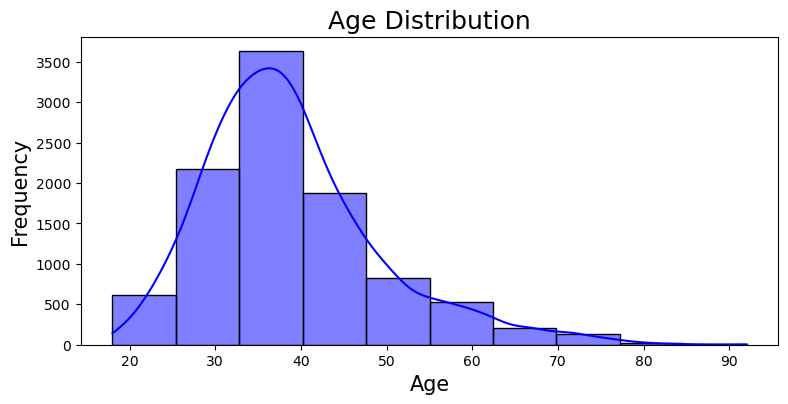

In [6]:
# Plotting the age distribution
plt.figure(figsize=(9,4))
sns.histplot(bank['Age'], bins=10, kde=True, color='blue')

plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.show()

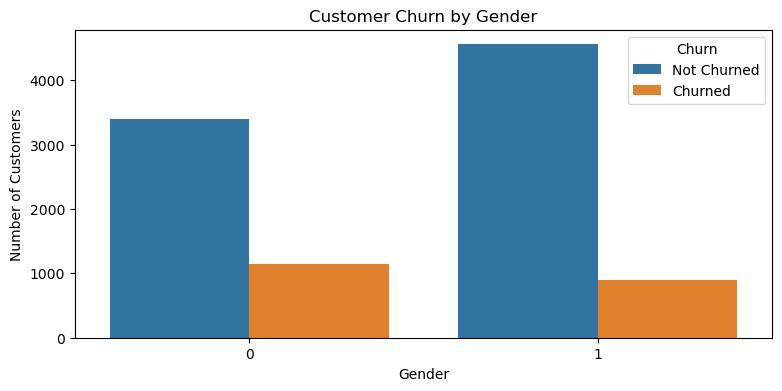

In [31]:
plt.figure(figsize=(9,4))
sns.countplot(x='Gender', hue='Exited', data=bank)

plt.title('Customer Churn by Gender', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.show()

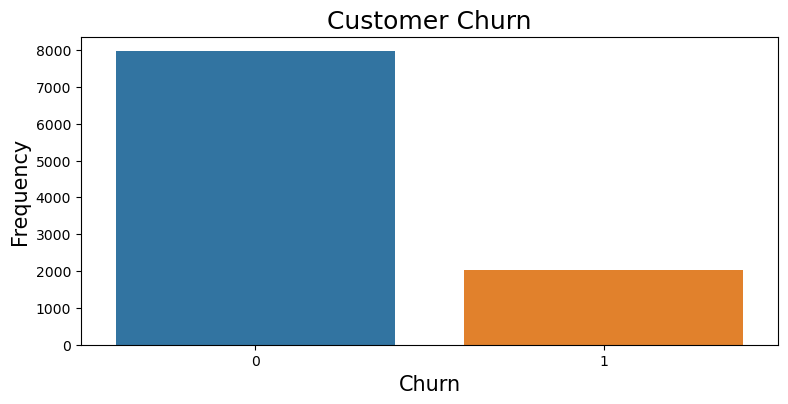

In [8]:
# Plotting no of Churns
plt.figure(figsize=(9,4))
sns.countplot(x='Exited',data=bank)

plt.title('Customer Churn', fontsize=18)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.show()

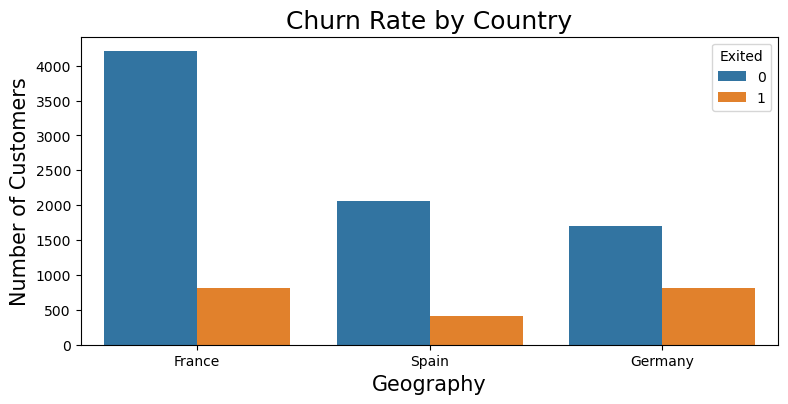

In [9]:
churn_rate_country=bank.groupby('Geography')['Exited'].mean()
# plotting the Chrun rate by Coutry
plt.figure(figsize=(9,4))
sns.countplot(x='Geography', hue='Exited', data=bank)

plt.title('Churn Rate by Country', fontsize=18)
plt.xlabel('Geography', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)

plt.show()


Conclusion- In the Geography term vise France have more no of customers Active and Spain have less no of non active members

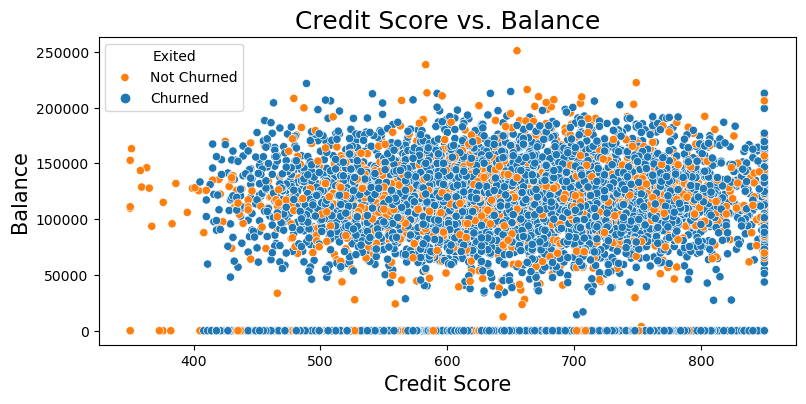

In [10]:
# plotting the scatterplot credit score vs balance
plt.figure(figsize=(9,4))
sns.scatterplot(data=bank,x='CreditScore',y='Balance',hue='Exited')

plt.title('Credit Score vs. Balance', fontsize=18)
plt.xlabel('Credit Score', fontsize=15)
plt.ylabel('Balance', fontsize=15)
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])

plt.show()


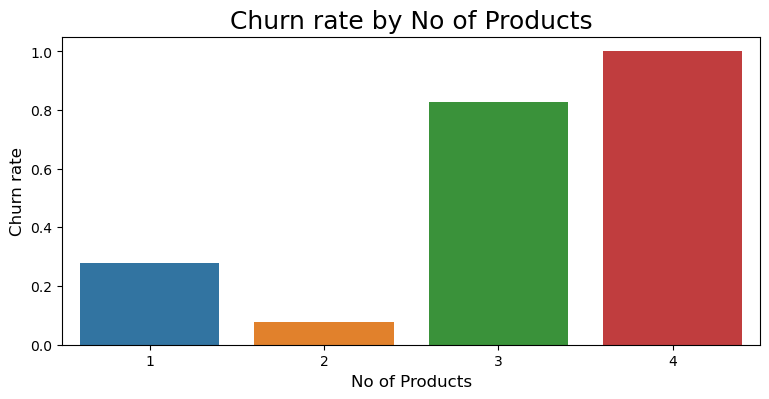

In [11]:
churn_rate_product=bank.groupby('NumOfProducts')['Exited'].mean().reset_index()
# plotting bar-plot for churn rate by No of products
plt.figure(figsize=(9,4))
sns.barplot(x='NumOfProducts',y='Exited',data=churn_rate_product)

plt.title('Churn rate by No of Products',fontsize=18)
plt.ylabel('Churn rate',fontsize=12)
plt.xlabel('No of Products',fontsize=12)

plt.show()

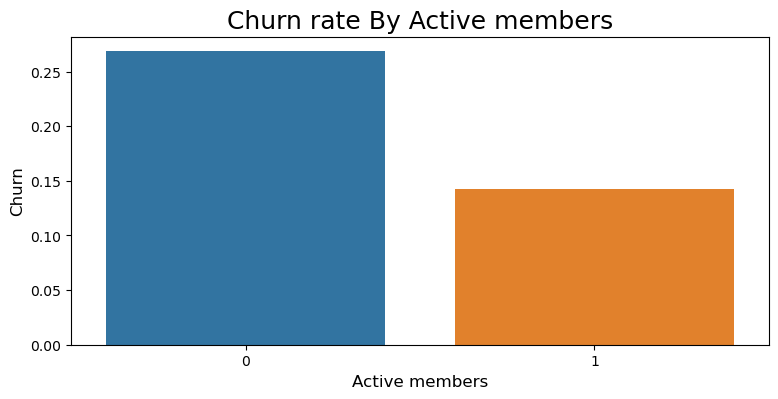

In [12]:
churn_rate=bank.groupby('IsActiveMember')['Exited'].mean().reset_index()
# plotting Barplot of Churn rate by Active members
plt.figure(figsize=(9,4))
sns.barplot(x='IsActiveMember',y='Exited',data=churn_rate)

plt.title('Churn rate By Active members',fontsize=18)
plt.xlabel('Active members',fontsize=12)
plt.ylabel('Churn',fontsize=12)

plt.show()


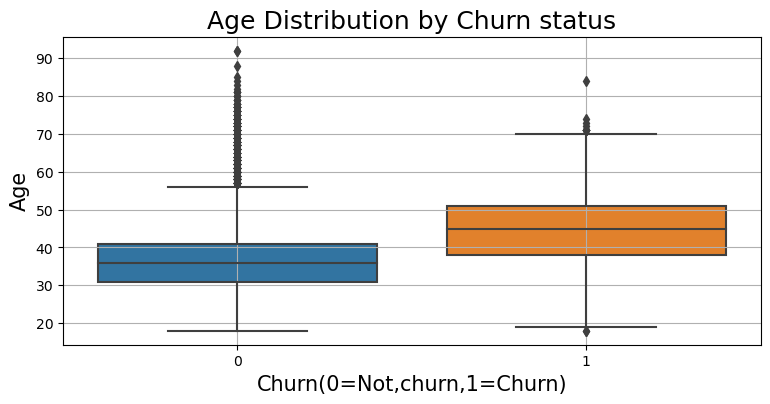

In [13]:
# Plotting Age distribution by Churn status
plt.figure(figsize=(9,4))
sns.boxplot(x='Exited',y='Age',data=bank)

plt.title('Age Distribution by Churn status',fontsize=18)
plt.xlabel('Churn(0=Not,churn,1=Churn)',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.grid()
plt.show()

# 📌 Correlation between Features 

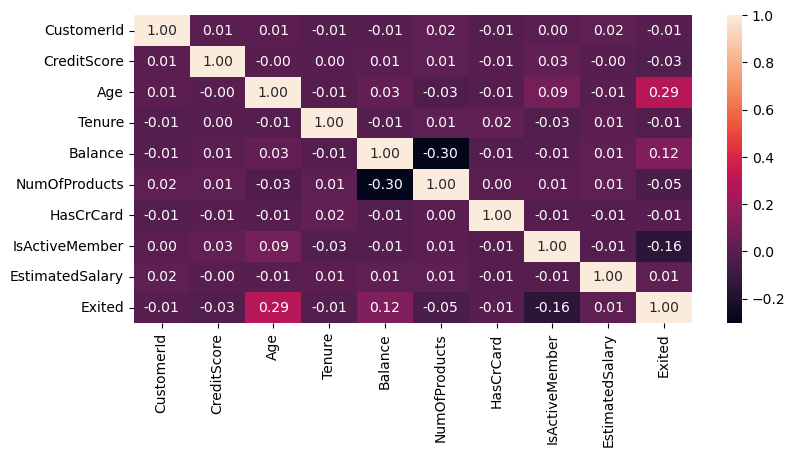

In [14]:
numeric_bank=bank.select_dtypes(include=['number'])
# calculate the correlation matrix
correlation_matrix=numeric_bank.corr()
plt.figure(figsize=(9,4))
#create a heatmap
sns.heatmap(correlation_matrix,annot=True,fmt='.2f')
plt.show()

#   📌 Data preprocessing 

 To Convert Categorical data into Numerical input

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [16]:
# Encoding Categorical Features
Label_encoder=LabelEncoder()
bank['Geography']=Label_encoder.fit_transform(bank['Geography'])
bank['Gender']=Label_encoder.fit_transform(bank['Gender'])

In [17]:
# Remove the CustomerId and Surname as it doesnt have any impact on the data
bank.drop(columns=['CustomerId','Surname'],inplace=True)
bank.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

#  📌 Model Building & Training 

In [18]:
x=bank.drop('Exited',axis=1)
y=bank['Exited']

In [19]:
# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(f'x_train shape:{x_train.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'x_test shape:{x_test.shape}')
print(f'y_test shape:{y_test.shape}')

x_train shape:(8000, 10)
y_train shape:(8000,)
x_test shape:(2000, 10)
y_test shape:(2000,)


In [20]:
# Scaling the data using Standard scaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# 📌 Logistic Regression 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,classification_report

In [22]:
# train the data
model=LogisticRegression()
model.fit(x_train,y_train)

# make predictions
y_pred=model.predict(x_test)

Accuracy Score: 0.815

Confusion Matrix:
 [[1559   48]
 [ 322   71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



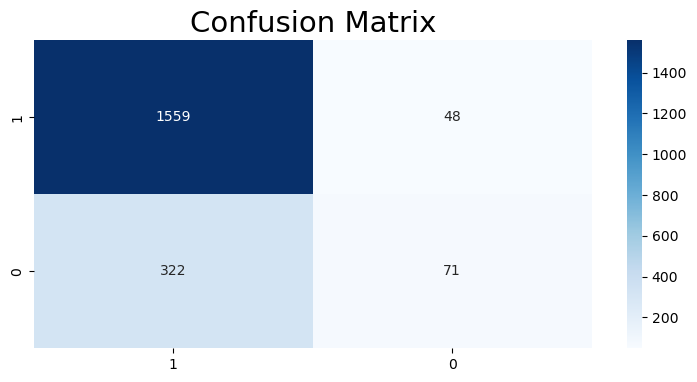

In [23]:
# Evaluate Model
accuarcy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# visualize Confusion matrix
plt.figure(figsize=(9,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=bank['Exited'].unique(),yticklabels=bank['Exited'].unique())
plt.title('Confusion Matrix',fontsize=21)
plt.show()

# 📌 Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [25]:
#Train Random forest model
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)

# Train the model 
rf_model.fit(x_train,y_train)

# make Predictions
y_pred=rf_model.predict(x_test)

Accuracy Score: 0.8645

Confusion Matrix:
 [[1545   62]
 [ 209  184]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



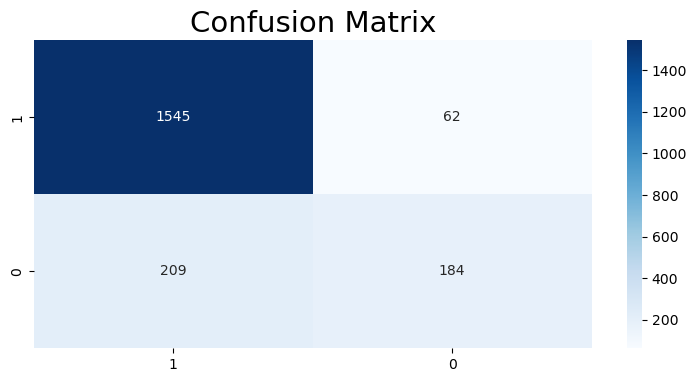

In [26]:
# Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
class_repor=classification_report(y_test,y_pred)

# print 
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# visualize Confusion matrix
plt.figure(figsize=(9,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=bank['Exited'].unique(),yticklabels=bank['Exited'].unique())
plt.title('Confusion Matrix',fontsize=21)
plt.show()

# 📌 Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [28]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

Accuracy Score: 0.779

Confusion Matrix:
 [[1357  250]
 [ 192  201]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



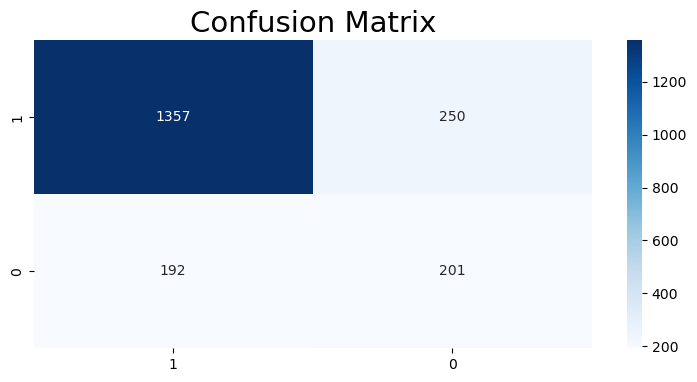

In [29]:
# Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
class_repor=classification_report(y_test,y_pred)

# print 
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# visualize Confusion matrix
plt.figure(figsize=(9,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=bank['Exited'].unique(),yticklabels=bank['Exited'].unique())
plt.title('Confusion Matrix',fontsize=21)
plt.show()

# 📌 Logistic regression, Random forest & Decision tree 
only Accuracy 

In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to hold accuracy results
accuracy_results = {}

# Train each model and calculate accuracy
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_results[model_name] = accuracy  # Store accuracy in the dictionary

# Convert the accuracy results to a DataFrame
final_result = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# Display the DataFrame
print(final_result)

                 Model  Accuracy
0  Logistic Regression     0.815
1        Random Forest     0.867
2        Decision Tree     0.787
